# Healthcare Inequalities: The Relationship Between Diabetes Diagnosis and Average Income in The US

## Permissions

- [ X ] YES - make available
- [   ] NO - keep private

## Overview

The project focuses on the relationship between median income and diabetes diagnosis across cities in the US. One in ten people in the US has a diabetes diagnosis. One of the major factors affecting the risk of diabetes is socioeconomic status; therefore, it is critical to investigate to what extent one's income affects this diagnosis. We based our analysis on CDC and the Census data investigating the relationships between those variables.

# Names

Varsha Sampath\
Elise Davis\
Kody Chuang\
Anna Sim

<a id='research_question'></a>
# Research Question

*Is there a correlation between average income and rate of diabetes diagnosis?*

## Background & Prior Work

Extensive research on diabetes shows that it is one of the most prevalent issues affecting people in the US. According to the National Diabetes Statistics Report of 2022, diabetes affects 11.3 % of the US population [1]. In 2021 more than 100,000 people died because of diabetes and relative complications, making it the eighth leading cause of death according to the CDC [2].

In 2017 American Diabetes Association (ADA) estimated that the total cost of diabetes for the healthcare system was 327 billion dollars compared to 245 billion dollars in 2012. It is a 26% increase over the five-year period [5].

Additionally, diabetes disproportionately affects low-income households. The CDC reports that the comparative statistics on people from middle-income, near-poor, and poor households are 40.0%, 74.1%, and 100.4% [3]. 2020 Review on Social Determinants of Diabetes states that three major factors contributing to the risk of diabetes are education, income, and occupation [4].

The number of people who are diagnosed with diabetes is rising every year. CDC report on "Disparities in the Prevalence of Diagnosed Diabetes" in the US shows that the number of people with diabetes has significantly increased when comparing 1999 – 2002 to 2011 – 2014 [3].

The literature review showed that several studies looked at the relationship between socioeconomic status and the risk of diabetes in different countries. For example, a 2001 study: "Socioeconomic status and type 2 diabetes in African American and non-Hispanic white women and men: evidence from the Third National Health and Nutrition Examination Survey," showed a significant association between Type 2 Diabetes and socioeconomic status [6]. Additionally, Type 2 diabetes has a stronger association with Poverty Income Ratio than with education or occupation [6]. In the last few years, more and more data is becoming available, and there is an ongoing demand for continuous analysis of this public health issue. We examined the relationship between average household income in the major US cities and the number of people with diabetes.

Citations:

[1] Centers for Disease Control and Prevention. (2022, October 25). By the numbers: Diabetes in America. Centers for Disease Control and Prevention. Retrieved March 5, 2023, from https://www.cdc.gov/diabetes/health-equity/diabetes-by-the-numbers.html

[2] Centers for Disease Control and Prevention. (2023, January 18). FASTSTATS - leading causes of death. Centers for Disease Control and Prevention. Retrieved March 5, 2023, from https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm

[5] The cost of diabetes. The Cost of Diabetes | ADA. (n.d.). Retrieved March 5, 2023, from https://diabetes.org/about-us/statistics/cost-diabetes

[3] Centers for Disease Control and Prevention. (2017, August 14). Disparities in the prevalence of diagnosed diabetes - United States, 1999–2002 and 2011–2014. Centers for Disease Control and Prevention. Retrieved March 5, 2023, from https://www.cdc.gov/mmwr/volumes/65/wr/mm6545a4.htm

[4] Felicia Hill-Briggs, Nancy E. Adler, Seth A. Berkowitz, Marshall H. Chin, Tiffany L. Gary-Webb, Ana Navas-Acien, Pamela L. Thornton, Debra Haire-Joshu; Social Determinants of Health and Diabetes: A Scientific Review. Diabetes Care 1 January 2021; 44 (1): 258–279. https://doi.org/10.2337/dci20-0053

[6] Robbins JM, Vaccarino V, Zhang H, Kasl SV. Socioeconomic status and type 2 diabetes in African American and non-Hispanic white women and men: evidence from the Third National Health and Nutrition Examination Survey. Am J Public Health. 2001 Jan;91(1):76-83. doi: 10.2105/ajph.91.1.76. PMID: 11189829; PMCID: PMC1446485.

# Hypothesis

$H_{0}$: There is no correlation between median income and rate of diabetes diagnosis.\
$H_{a}$: Rate of diabetes diagnosis is inversely proportional to mean income.

# Dataset(s)

**Dataset #1**
- Dataset Name: US Household Income Statistics
- Link to the dataset: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations 
- Number of observations: 
32,000 records on US Household Income Statistics, including mean income for each city.

**Dataset #2**
- Dataset Name: 500 Cities: Diagnosed Diabetes among adults
- Link to the dataset: https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Diagnosed-diabetes-among-adults-aged-18/cn78-b9bj/data 
- Number of observations: 29,006
Records for percent of people in each city (of thousands) that have been diagnosed with diabetes.

We plan to cross reference the cities in each data set to combine the mean income data and the diabetes data, to then analyze and uncover any correlation.

# Setup

In [2]:
# import pandas & numpy library
import pandas as pd
import numpy as np
# pd.set_option("display.max_columns", 104)

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

### Dataset #1 Cleaning

Firstly, we sorted the values by area land and dropped the duplicates that occurred in data collection. After that, unnecessary columns were dropped. We ended up with 8128 observations.

In [3]:
inc = pd.read_csv("kaggle_income.csv", na_filter = True, encoding='latin-1')
inc.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [4]:
inc = inc.sort_values(by = 'ALand', ascending = False)\
                        .drop_duplicates(subset=['City'])\
                        .reset_index(drop= True)

In [5]:
inc = inc.drop(columns = ['id', 'State_Code', 'County',
                          'Place', 'Type', 'Primary',
                          'Zip_Code', 'Area_Code', 'ALand',
                          'AWater', 'Lat','Lon', 'sum_w' ])

In [6]:
inc.sort_values('Stdev',ascending = False )

,State_Name,State_ab,City,Mean,Median,Stdev
2303,Florida,FL,Lehigh Acres,122318,127896,102171
503,Texas,TX,Jewett,100110,41907,100239
1456,California,CA,Avery,124426,300000,96241
7054,North Carolina,NC,Carrboro,96387,300000,94721
7553,California,CA,Pacific Palisades,144174,158988,94528
...,...,...,...,...,...,...
3856,California,CA,Anaheim,0,0,0
3887,Missouri,MO,St Charles,0,0,0
8055,Texas,TX,Del Valle,0,0,0
5476,Louisiana,LA,Fort Polk,0,0,0


Additionally, there appeared to be an error in the data for Median Income. The data shows that Median Income for 1053 entries is $300,000. So we cannot use the column Median Income.

In [7]:
inc[inc['Median']==300000]

,State_Name,State_ab,City,Mean,Median,Stdev
16,Wyoming,WY,Cody,72151,300000,36256
38,Maine,ME,Jackman,52315,300000,32439
42,Arizona,AZ,Winslow,74749,300000,44849
47,New Mexico,NM,Tatum,80419,300000,45735
64,Idaho,ID,Leadore,49723,300000,52335
...,...,...,...,...,...,...
8091,West Virginia,WV,Volga,55987,300000,23513
8097,Pennsylvania,PA,Turbotville,54304,300000,31360
8101,New Jersey,NJ,West New York,67035,300000,46989
8105,Vermont,VT,East Montpelier,54118,300000,33422


In [8]:
inc = inc.drop(columns = 'Median')

In [9]:
inc

,State_Name,State_ab,City,Mean,Stdev
0,Alaska,AK,Kiana,58546,45306
1,Alaska,AK,Huslia,40950,34933
2,Alaska,AK,Takotna,53751,45019
3,Alaska,AK,Copper Center,50328,44831
4,Alaska,AK,Egegik,62733,52096
...,...,...,...,...,...
8123,Michigan,MI,Pentwater,0,0
8124,Florida,FL,Cedar Key,0,0
8125,Florida,FL,Ocoee,0,0
8126,Maryland,MD,Ridge,0,0


###  Dataset #2 Cleaning

In the current dataset, the entries were made gradually until the whole population of the city was covered. We have dropped the intermediate entries and kept the remaining 475 cities. The columns with unnecessary information were dropped, the index was reset, and the values were sorted.

In [10]:
db = pd.read_csv("Diagnosed_Diabetes.csv", na_filter = True, thousands=',', decimal='.')
db.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Inglewood,Census Tract,BRFSS,Health Outcomes,0636546-06037601801,Diagnosed diabetes among adults aged >=18 Years,%,...,13.5,NaN,NaN,2472,"(33.9439711273, -118.349937728)",HLTHOUT,DIABETES,636546.0,6.037602e+09,Diabetes
1,2017,AL,Alabama,Huntsville,Census Tract,BRFSS,Health Outcomes,0137000-01089002922,Diagnosed diabetes among adults aged >=18 Years,%,...,10.3,NaN,NaN,4387,"(34.612755588, -86.5329568642)",HLTHOUT,DIABETES,137000.0,1.089003e+09,Diabetes
2,2017,AK,Alaska,Anchorage,Census Tract,BRFSS,Health Outcomes,0203000-02020002501,Diagnosed diabetes among adults aged >=18 Years,%,...,7.8,NaN,NaN,4993,"(61.1593945029, -149.899866691)",HLTHOUT,DIABETES,203000.0,2.020003e+09,Diabetes
3,2017,AZ,Arizona,Tempe,Census Tract,BRFSS,Health Outcomes,0473000-04013319907,Diagnosed diabetes among adults aged >=18 Years,%,...,7.9,NaN,NaN,2225,"(33.3419171912, -111.919809152)",HLTHOUT,DIABETES,473000.0,4.013320e+09,Diabetes
4,2017,AZ,Arizona,Yuma,City,BRFSS,Health Outcomes,0485540,Diagnosed diabetes among adults aged >=18 Years,%,...,11.3,NaN,NaN,93064,"(32.5986027117, -114.54836837)",HLTHOUT,DIABETES,485540.0,NaN,Diabetes


In [11]:
db = db.drop(columns=['Year', 'DataSource', 'Measure',
                      'CategoryID', 'Category', 'MeasureId',
                      'Short_Question_Text', 'TractFIPS','GeographicLevel',
                      'UniqueID', 'GeoLocation', 'CityFIPS',
                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                      'Low_Confidence_Limit', 'High_Confidence_Limit', 'DataValueTypeID'])

In [12]:
db = db[['StateAbbr',
         'StateDesc',
         'CityName',
         'Data_Value_Type',
         'Data_Value_Unit',
         'Data_Value',
         'PopulationCount']]

In [13]:
db = db.sort_values(by = 'PopulationCount', ascending = False)\
                    .drop_duplicates(subset=['CityName'], keep='first')\
                    .reset_index(drop= True)

In [14]:
db

,StateAbbr,StateDesc,CityName,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount
0,US,United States,NaN,Crude prevalence,%,10.8,308745538
1,NY,New York,New York,Crude prevalence,%,10.9,8175133
2,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621
3,IL,Illinois,Chicago,Age-adjusted prevalence,%,12.2,2695598
4,TX,Texas,Houston,Age-adjusted prevalence,%,13.3,2099451
...,...,...,...,...,...,...,...
470,GA,Georgia,Warner Robins,Age-adjusted prevalence,%,12.0,66588
471,SC,South Carolin,Rock Hill,Age-adjusted prevalence,%,12.4,66154
472,NY,New York,Schenectady,Crude prevalence,%,10.5,66135
473,WY,Wyoming,Cheyenne,Age-adjusted prevalence,%,8.2,59466


### Merging of two data frames

Lastly, two data sets were merged together. Repeated columns were dropped.\
As a result we got 278 cities in our analysis.

In [15]:
df = pd.merge(db, inc, how='inner', left_on=['CityName', 'StateDesc'], right_on=['City', 'State_Name'])

In [16]:
df

,StateAbbr,StateDesc,CityName,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,State_Name,State_ab,City,Mean,Stdev
0,NY,New York,New York,Crude prevalence,%,10.9,8175133,New York,NY,New York,0,0
1,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621,California,CA,Los Angeles,189728,84217
2,IL,Illinois,Chicago,Age-adjusted prevalence,%,12.2,2695598,Illinois,IL,Chicago,67450,62043
3,AZ,Arizona,Phoenix,Crude prevalence,%,9.5,1445632,Arizona,AZ,Phoenix,68506,56207
4,TX,Texas,San Antonio,Age-adjusted prevalence,%,13.7,1327407,Texas,TX,San Antonio,89970,65863
...,...,...,...,...,...,...,...,...,...,...,...,...
273,MT,Montana,Missoula,Crude prevalence,%,6.0,66788,Montana,MT,Missoula,78840,61392
274,CA,California,Redondo Beach,Age-adjusted prevalence,%,6.3,66748,California,CA,Redondo Beach,109016,58288
275,LA,Louisiana,Kenner,Age-adjusted prevalence,%,11.9,66702,Louisiana,LA,Kenner,90715,62857
276,GA,Georgia,Warner Robins,Age-adjusted prevalence,%,12.0,66588,Georgia,GA,Warner Robins,50358,9547


In [17]:
df = df.drop(columns=['StateAbbr', 'StateDesc', 'CityName'])

In [18]:
df = df [[
    'State_ab',
    'State_Name',
    'City',
    'Data_Value_Type',
    'Data_Value_Unit',
    'Data_Value',
    'PopulationCount',
    'Mean',
    'Stdev']]

### Final Touches

We discovered some income-statistic values were missing, so we dropped them too.

In [19]:
df.sort_values(by = 'Mean', ascending = False)

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
1,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621,189728,84217
33,CA,California,Santa Ana,Age-adjusted prevalence,%,13.8,324528,172734,78612
130,CA,California,Costa Mesa,Age-adjusted prevalence,%,9.0,109960,168957,79604
220,TX,Texas,Sugar Land,Age-adjusted prevalence,%,9.3,78817,159750,69908
118,FL,Florida,Coral Springs,Age-adjusted prevalence,%,8.6,121096,150858,80583
...,...,...,...,...,...,...,...,...,...
166,TX,Texas,College Station,Crude prevalence,%,4.8,93857,20684,21892
55,TX,Texas,Irving,Crude prevalence,%,9.8,216290,0,0
74,TN,Tennessee,Knoxville,Age-adjusted prevalence,%,11.6,178874,0,0
31,CA,California,Anaheim,Crude prevalence,%,9.9,336265,0,0


In [20]:
df = df.drop(index = [0, 31, 74, 55], axis=0)

In [21]:
df = df.sort_values(by = 'State_ab').reset_index(drop= True)

### Results:

Now the resulting data frame contains 274 cities.

In [22]:
df

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
0,AK,Alaska,Anchorage,Crude prevalence,%,7.3,291826,77110,54957
1,AL,Alabama,Birmingham,Age-adjusted prevalence,%,16.2,212237,50662,43229
2,AL,Alabama,Hoover,Age-adjusted prevalence,%,8.1,81619,118301,67248
3,AL,Alabama,Mobile,Age-adjusted prevalence,%,13.5,195111,53330,50855
4,AL,Alabama,Tuscaloosa,Crude prevalence,%,10.2,90468,55815,54867
...,...,...,...,...,...,...,...,...,...
269,WA,Washington,Yakima,Crude prevalence,%,11.8,91067,89816,48414
270,WI,Wisconsin,Milwaukee,Age-adjusted prevalence,%,11.3,594833,78720,47064
271,WI,Wisconsin,Kenosha,Crude prevalence,%,8.4,99218,61404,35324
272,WI,Wisconsin,Waukesha,Crude prevalence,%,7.1,70718,98823,56923


# Data Analysis & Results (EDA)

Firstly, we did preliminary plotting to understand the relationship between the data.

Text(0.5, 1.0, 'Preliminary Plot')

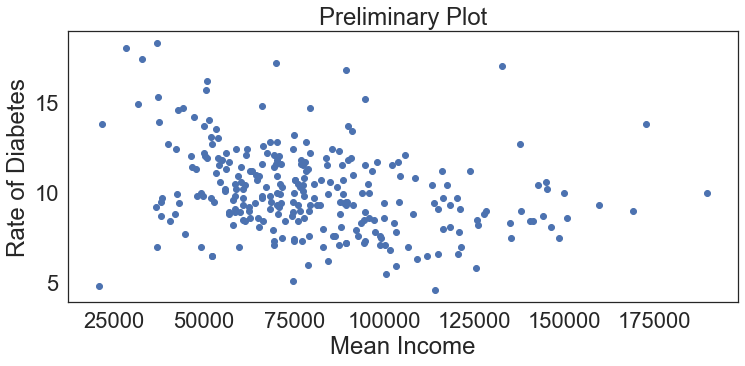

In [23]:
plt.scatter(df['Mean'].values, df['Data_Value'].values)
plt.xlabel("Mean Income")
plt.ylabel("Rate of Diabetes")
plt.title("Preliminary Plot")

In [24]:
np.corrcoef(df['Data_Value'], df['Mean'])

array([[ 1.        , -0.28618962],
       [-0.28618962,  1.        ]])

The correlation coefficient between the rate of diabetes and mean income is -0.286, which indicates the current correlation is negative. Now, we need to perform outlier detection.

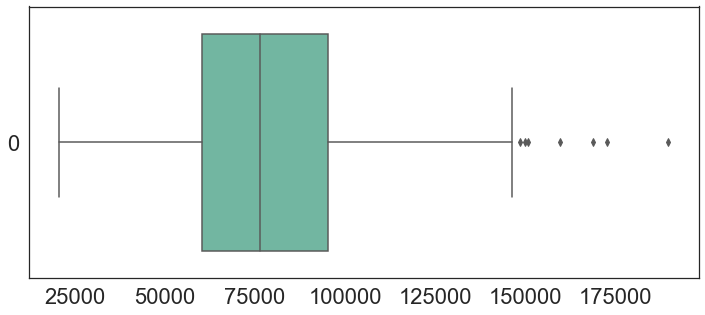

In [25]:
ax = sns.boxplot(data=df['Mean'], orient='h', palette='Set2')

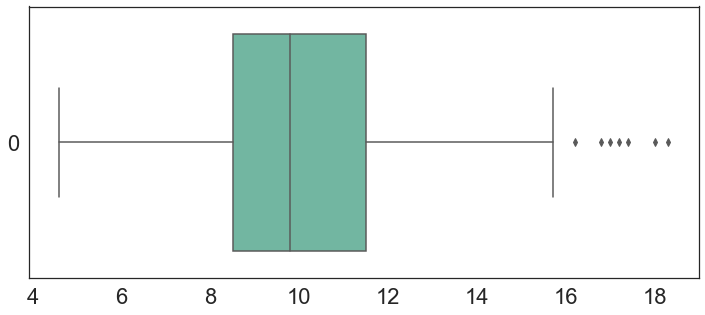

In [26]:
ax = sns.boxplot(data=df['Data_Value'], orient='h', palette='Set2')

It appears both mean income and rate of diabetes have a few outliers on the high numeric end, as can be seen from the box plots.

In [27]:
outliers = df.loc[(df['Data_Value'] > 16) | (df['Mean'] >= 150000)]
outliers

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
1,AL,Alabama,Birmingham,Age-adjusted prevalence,%,16.2,212237,50662,43229
25,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621,189728,84217
38,CA,California,Costa Mesa,Age-adjusted prevalence,%,9.0,109960,168957,79604
78,CA,California,Santa Ana,Age-adjusted prevalence,%,13.8,324528,172734,78612
129,FL,Florida,Coral Springs,Age-adjusted prevalence,%,8.6,121096,150858,80583
171,MI,Michigan,Detroit,Crude prevalence,%,18.3,713777,36811,37336
174,MI,Michigan,Flint,Crude prevalence,%,17.2,102434,70076,33903
192,NJ,New Jersey,Passaic,Age-adjusted prevalence,%,17.0,69781,132678,75406
193,NJ,New Jersey,Paterson,Age-adjusted prevalence,%,16.8,146199,89314,57122
202,NY,New York,New Rochelle,Crude prevalence,%,10.0,77062,150034,83563


These are the table results where either the data value or the average income are outside of the intervals described by the boxplot. Let's plot them.

Text(0.5, 1.0, 'Outliers')

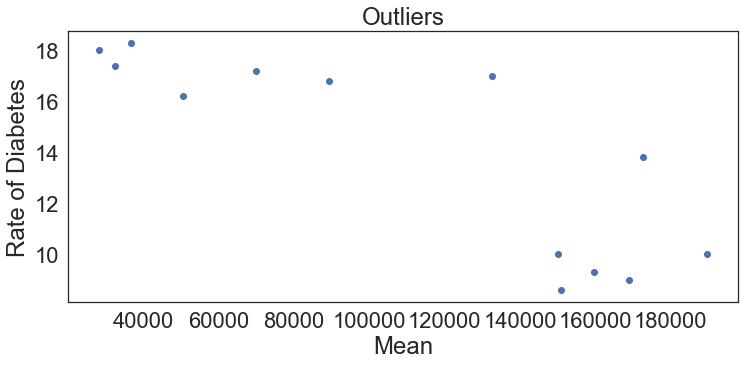

In [28]:
plt.scatter(outliers['Mean'].values, outliers['Data_Value'].values)
plt.xlabel("Mean")
plt.ylabel("Rate of Diabetes")
plt.title("Outliers")

Visually, these appear to be outliers in both directions. Let's see how the correlation changes when we remove them from the data set.

In [29]:
df_no_outliers = df[(df['Data_Value'] < 16) & (df['Mean'] < 150000)]
df_no_outliers

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
0,AK,Alaska,Anchorage,Crude prevalence,%,7.3,291826,77110,54957
2,AL,Alabama,Hoover,Age-adjusted prevalence,%,8.1,81619,118301,67248
3,AL,Alabama,Mobile,Age-adjusted prevalence,%,13.5,195111,53330,50855
4,AL,Alabama,Tuscaloosa,Crude prevalence,%,10.2,90468,55815,54867
5,AR,Arkansas,Springdale,Crude prevalence,%,9.8,69797,68276,66109
...,...,...,...,...,...,...,...,...,...
269,WA,Washington,Yakima,Crude prevalence,%,11.8,91067,89816,48414
270,WI,Wisconsin,Milwaukee,Age-adjusted prevalence,%,11.3,594833,78720,47064
271,WI,Wisconsin,Kenosha,Crude prevalence,%,8.4,99218,61404,35324
272,WI,Wisconsin,Waukesha,Crude prevalence,%,7.1,70718,98823,56923


Text(0.5, 1.0, 'Rate of Diabetes vs Mean Income')

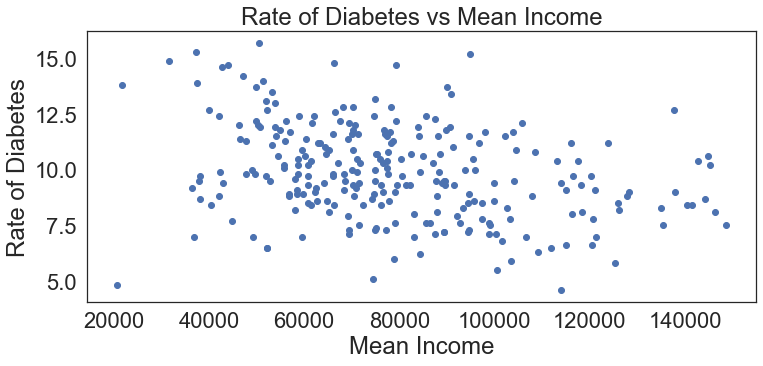

In [30]:
plt.scatter(df_no_outliers['Mean'].values, df_no_outliers['Data_Value'].values)
plt.xlabel("Mean Income")
plt.ylabel("Rate of Diabetes")
plt.title('Rate of Diabetes vs Mean Income')

In [31]:
corr_matrix = np.corrcoef(df_no_outliers['Data_Value'], df_no_outliers['Mean'])
corr_matrix

array([[ 1.        , -0.32195793],
       [-0.32195793,  1.        ]])

The final correlation coefficient is -0.32.

In [32]:
df = df_no_outliers

From this, we'll get the r value to understand what proportion of the variance is shared between the two variables.

In [33]:
corr = corr_matrix[0,1]
corr


-0.32195792608378515

In [34]:
r_squared = corr**2
r_squared

0.10365690616817207

This value may seem small, but let's see if it passes the correlation test with alpha level 0.01, which is more telling than just looking at the scatter plot.

In [35]:
# need to install latest scipy
from scipy.stats.stats import pearsonr

pearsonr(df["Data_Value"], df["Mean"], alternative='less')


PearsonRResult(statistic=-0.3219579260837851, pvalue=5.2251332563960395e-08)

According to the Pearsons R test, our value of -0.322 shows moderate correlation between the two variables and since the corresponding p value is less than our alpha level of 0.01 we can conclude that our results are statistically significant. However, quanitifying a relationship between the two variables using Pearson's correlation coefficient is only one part of understanding the complete relationship between median income and adults with diabetes in American cities.
To further our deep dive into this relationship, we must draw conclusions about populations and not just samples so we must conduct other statistical significance tests.

## What should we do with this section?
## Significance Testing

A significance test teslls us whether or not what we observe in the sample is expected to be true across all of the population. This can be done through a hypothesis test.

Here we are importaing all of the packages that we will use to run the significance tests in this section

In [36]:
#import scipy.stats to access the t-test function that allows us to
#conduct our hypothesis testing
import scipy.stats as stats
from scipy.stats import ttest_ind

### Hypothesis Test

A hypothesis test helps us infer whether the value of the population correlation coefficient $\rho$ is close to or very different from 0. This inference is decided based on the sample correlation coefficient r and the sample size n.

$H_{0}$ ($\rho$ = 0): There is no correlation between median income and rate of diabetes diagnosis.\
$H_{a}$ ($\rho$ != 0): Rate of diabetes diagnosis is correlated to  median income.

### T-test

A T-test is an inferential statistic that allows us to use sample data to generalize an assumption to an entire population. This will help us find out if the sample correlation between median income and adults with diabetes is repeatable for the entire population

In [37]:
#Runs a t-test using stats.ttest_ind from scipy.stats
#saves the t-value to t_val and saves the p-value to p_val
[t_val, p_val] = stats.ttest_ind(df['Data_Value'], df['Mean'])

#### T-value

From the t-test above we get the t-value to be:

In [38]:
t_val

-49.19021179782787

In t-tests, the bigger the t-value, the more likely that the correlation is repeatable. The "bigness" of the t-value is subjective so we must calculate the p-value to tell us how big is "big enough"

#### P-value

Every t-test has one t-value and one p-value. A p-value is the probability that the null hypothesis is true, which is the probability that there is no correlation between median household income and adults with diabetes in American cities.

E.g. A p-value of 0.05 means there is a 5% chance results from the dataset occurred to chance and there is no correlation.

From the t-test above we get the t-value to be:

In [39]:
p_val

9.745275026264399e-198

#### Decision

To decide whether we reject the null hypothesis in favor of the alternative, we must use the previouse t-values and p-values to see if our correlation is statistically significant.

In most research the threshold for significance is which there is a p-value of 0.05 or below. Significance levels like these are refered to as $\alpha$. For our data, we want to be extra sure that our data did not occur just by chance, so we will have our significance level be an $\alpha$ value of 0.01 This indicates that a our data would be statistically significant if 
($\alpha$ = 0.01) and (p-value < $\alpha$)

We can check that here:

In [40]:
#Check whether our p-value from above is less than the significance level(alpha) of 0.01
alpha = 0.01
stat_sig = (p_val < alpha)
stat_sig

True

As we can see, our p-value of 2.09e-189 is way below our significance level of $\alpha$ = 0.01 meaning that our data is statistically significant and there is a real correlation between median household income and adults with diabetes in American cities. 

From this, we can now comfortably reject the null hypothesis in favor of the alternative:

~~$H_{0}$: There is no correlation between median income and rate of diabetes diagnosis.~~ 

__$H_{a}$: Rate of diabetes diagnosis is inversely proportional to median income.__



### Linear Regression

Using linear regression, we hope to fit a line to the data. Therefore, the model takes the form y=ax+b, or $y = a_{0} + a_{1}x_{1}$

In [41]:
# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [42]:
# Use patsy to organize our data into predictor and outputs
#   The string `Data_Value ~ Mean` indicates to predict Data_Value (Percentage of Diabetes) as a function of Mean (Mean income)
outcome, predictors = patsy.dmatrices('Data_Value ~ Mean', df)

In [43]:
# Initialize an OLS model object
#   Note: This initializes the model, and provides the data 
#         but does not actually compute the model yet
model = sm.OLS(outcome, predictors)

In [44]:
# Finally, fit the model
results = model.fit()

In [45]:
# Check out the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Data_Value   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     29.95
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           1.05e-07
Time:                        20:07:57   Log-Likelihood:                -550.70
No. Observations:                 261   AIC:                             1105.
Df Residuals:                     259   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9565      0.398     30.029      0.0

This shows the parameters for our model are 11.95 for $a_{0}$ and 2.615e-05 for $a_{1}$, so our model is $y = 11.95 + 2.615e-05x_{1}$

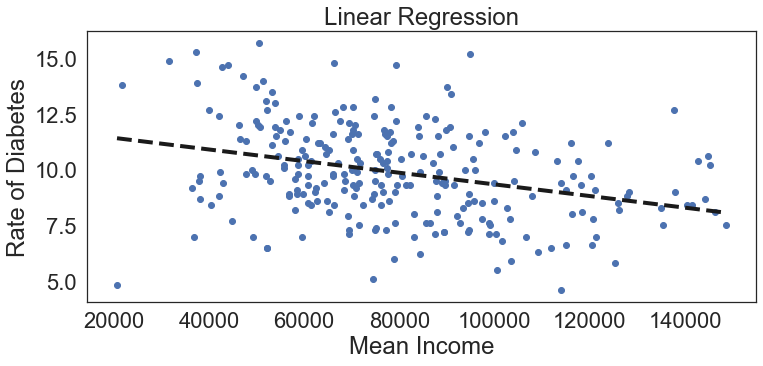

In [46]:
#replotting the data
plt.scatter(df['Mean'].values, df['Data_Value'].values)
plt.xlabel("Mean Income")
plt.ylabel("Rate of Diabetes")
plt.title('Linear Regression')
# Generate and plot the model fit line
xs = np.arange(df['Mean'].min(), df['Mean'].max())
ys = 11.9565 + -2.615e-05 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

The model can then be used for predicting diabetes rates based on new data.

## Ethics & Privacy

Ethics and privacy are critical considerations in any data science project, including the correlation between median income and the percentage of adults with diabetes in America. One of the primary ethical concerns in this area is the potential for bias in the data collection and analysis process. This could arise from various sources, such as sampling bias, data selection bias, or model bias. Additionally, there is a risk of privacy violation when personal information is collected and used without the consent of the individuals concerned. These ethical concerns must be taken seriously and managed appropriately throughout the data science process. To address potential biases and privacy concerns, our group took several steps. First, we examined the data sets to ensure that they were representative and unbiased. We also considered the ethical implications of our research question and made sure that we were not unintentionally perpetuating stereotypes or biases. Finally, we took steps to protect the privacy of individuals by gathering anonymized data and ensuring that we did not share or use it for purposes beyond our research.

There are potential biases in our dataset, including the exclusion of some populations, such as homeless individuals or those without access to healthcare. Additionally, the data may reflect human biases in terms of race, ethnicity, or gender. To detect these biases, we plan to conduct a thorough analysis of the data and use machine learning algorithms to identify any potential biases in our models.

In terms of data privacy and equitable impact, our analysis could potentially impact individuals with diabetes, particularly those from disadvantaged backgrounds. To address this, we will be transparent about our research and its potential impact. We will also take steps to ensure that our findings are used in a responsible and equitable way, and that they are not used to discriminate against individuals or groups.

## Conclusion & Discussion

By first organizing and cleaning our data and then performing correlational tests on the clean data, we were able to confirm that there is a relationship between mean income in a city and the rate of diabetes. Because of this, we could move forward and perform tests on the data to better understand this relationship. We found a low p-value (<0.001). We thus conclude that our result is statistically significant and decided to reject our null hypothesis. Based on our tests, we have shown that the rate of diabetes diagnosis is moderately negatively correlated to median income. We then took this information to create a linear regression in order to predict future diabetes rates based on income.

This research is important because health risks and their relationship to poverty and low-income households is an incredibly large problem worldwide. In America, where healthcare is not free, a family with low income cannot necessarily afford insulin, given its incredibly high price. Bringing awareness to this issue is necessary to understand why universally accessible healthcare is so important, and our analysis shows that income and high diabetes rates are, in fact, correlated.

## Team Contributions

**Project Design\
Overview\
Literature Review & Background\
Data Retrieval\
Data Cleaning\
Initial Plotting\
Outliers Detection Analysis\
Pearson Correlation Coeffiecient Estimation\
Hypothesis Testing\
Linear Regression Analysis\
Ethics & Privacy\
Conclusion & Discussion**